In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
import glob
import math

%matplotlib inline

In [2]:
path = '/home/jaeyeol/Downloads/dir1/data' 

trainimglist = glob.glob(path + '/ref*.jpg')
trainimglist.sort()
trainlabellist = glob.glob(path + '/label.jpg')
trainData = None
trainLabel = None
print ("%d train images" % (len(trainimglist)))
print ("%d train label" % (len(trainlabellist)))



7 train images
1 train label


In [3]:
print trainimglist
print trainlabellist

['/home/jaeyeol/Downloads/dir1/data/ref1.jpg', '/home/jaeyeol/Downloads/dir1/data/ref2.jpg', '/home/jaeyeol/Downloads/dir1/data/ref3.jpg', '/home/jaeyeol/Downloads/dir1/data/ref4.jpg', '/home/jaeyeol/Downloads/dir1/data/ref5.jpg', '/home/jaeyeol/Downloads/dir1/data/ref6.jpg', '/home/jaeyeol/Downloads/dir1/data/ref7.jpg']
['/home/jaeyeol/Downloads/dir1/data/label.jpg']


In [4]:
data = Image.open(trainimglist[0])
row = data.size[0]*data.size[1]

In [5]:
# 모든 밴드의 이미지를 불러 vectorization 후 concatenate.
# [0,0,0,0,0,0,0],[0,0,0,0,0,0,0] 이런식으로 저장

for (f1, i) in zip(trainimglist, range(len(trainimglist))):
    
    img = Image.open(f1)
    
    vec  = np.array(img).reshape(row, 1)/255
                  
    
    if i == 0:
        trainData = vec
    else:
        trainData = np.concatenate((trainData, vec), axis=1)
    
    print trainData.shape 

(117649, 1)
(117649, 2)
(117649, 3)
(117649, 4)
(117649, 5)
(117649, 6)
(117649, 7)


In [6]:
# trainLabel[i][0]가 1이면 적조 O.
# trainLabel[i][1]가 1이면 적조 X.
img = Image.open(trainlabellist[0])
    
trainLabel = np.array(img).reshape(row, 1)/255                              
trainLabel = np.concatenate((trainLabel, (1-trainLabel)), axis=1)  
print "\n",trainLabel.shape


(117649, 2)


In [7]:
x = tf.placeholder(tf.float32, [None, 7])
y = tf.placeholder(tf.float32, [None, 2])

W = tf.Variable(tf.truncated_normal([7, 2], stddev=1.0/math.sqrt(float(7))))
b = tf.Variable(tf.zeros([1,2]))


In [8]:
with tf.device('/cpu:0'):
    hypothesis = tf.nn.sigmoid(tf.add(tf.matmul(x, W), b))

    cost = -tf.reduce_mean(y*tf.log(hypothesis) + (1-y)*tf.log(1-hypothesis))

    optimizer = tf.train.GradientDescentOptimizer(0.01)

    train = optimizer.minimize(cost)

In [9]:
init = tf.global_variables_initializer()

sess = tf.Session()

sess.run(init)

In [10]:
for step in xrange(200000):
    sess.run(train, feed_dict = {x:trainData, y:trainLabel})
    if (step + 1) % 1000 ==0:
        print step + 1
        print "cost = ", sess.run(cost, feed_dict = {x:trainData, y:trainLabel})
        print "W", "\n", sess.run(W)
        print "b", "\n", sess.run(b), "\n"

1000
cost =  0.236539
W 
[[ 0.10879935  0.14145793]
 [-0.09934334 -0.14515986]
 [-0.08061381 -0.39752385]
 [ 0.57825315 -0.54322219]
 [ 0.14648315 -0.40409875]
 [ 0.28992882  0.33366737]
 [-0.15472791 -0.11731908]]
b 
[[-1.44632876  1.44632876]] 

2000
cost =  0.154225
W 
[[ 0.10879935  0.14145793]
 [-0.09934334 -0.14515986]
 [-0.08061381 -0.39752385]
 [ 0.57825315 -0.54322219]
 [ 0.14648315 -0.40409875]
 [ 0.28992882  0.33366737]
 [-0.15472791 -0.11731908]]
b 
[[-2.0786283  2.0786283]] 

3000
cost =  0.12516
W 
[[ 0.10879935  0.14145793]
 [-0.09934334 -0.14515986]
 [-0.08061381 -0.39752385]
 [ 0.57825315 -0.54322219]
 [ 0.14648315 -0.40409875]
 [ 0.28992882  0.33366737]
 [-0.15472791 -0.11731908]]
b 
[[-2.45675254  2.45675254]] 

4000
cost =  0.111547
W 
[[ 0.10879935  0.14145793]
 [-0.09934334 -0.14515986]
 [-0.08061381 -0.39752385]
 [ 0.57825315 -0.54322219]
 [ 0.14648315 -0.40409875]
 [ 0.28992882  0.33366737]
 [-0.15472791 -0.11731908]]
b 
[[-2.71759582  2.71759582]] 

5000
cost =

In [11]:
wei = sess.run(W)

In [12]:
wei

array([[ 0.10879935,  0.14145793],
       [-0.09934334, -0.14515986],
       [-0.08061381, -0.39752385],
       [ 0.57825315, -0.54322219],
       [ 0.14648315, -0.40409875],
       [ 0.28992882,  0.33366737],
       [-0.15472791, -0.11731908]], dtype=float32)

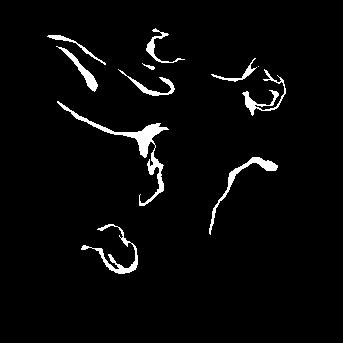

In [13]:
img

In [25]:
trainLabel[5100:5200]

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0,